# Buổi 12: Thuật toán tìm đường (Phần 2) - BFS 

## 1. Tìm kiếm theo chiều rộng (Breadth - First Search)
Tương tự như DFS, BFS cũng là thuật toán duyệt qua các đỉnh trong một đồ thì. Với BFS, các đỉnh gần điểm bắt đầu nhất sẽ được duyệt trước, sau đó đến các đỉnh xa hơn.

Thứ tự duyệt của BFS được thể hiện như sau: (trên visualgo). Nhờ đặc điểm này, thuật toán BFS đảm bảo tìm được đường đi ngắn nhất giữa hai đỉnh bất kì (Nếu tồn tại).

Mô tả: Thuật toán duyệt của BFS: 0. Khởi tạo một *queue* rỗng để chứa các đỉnh chờ duyệt
1. Đưa đỉnh xuất phát vào queue, đánh dấu đỉnh xuất phát đã được duyệt
2. Khi Queue vẫn còn phần tử, lấy ra đỉnh tiếp theo trong queue, xét các đỉnh kề với đỉnh vừa lấy: 
    2.1. Nếu đỉnh đang xét chưa được duyệt => đưa đỉnh đang xét vào queue, đánh dấu đã được duyệt.
    2.2. Nếu đỉnh đang xét được duyệt => bỏ qua

### Code
BFS không duyệt các đỉnh bằng đệ quy như DFS mà sử dụng vòng lặp và một queue để lưu các đỉnh chờ được duyệt.

In [2]:
from collections import deque

def bfs(graph, start):
    
    ## khởi tạo queue, và một collect set()
    visited = set()
    queue = deque()
    
    ## thêm đỉnh bắt đầu duyệt
    queue.append(start) #0 
    visited.add(start)
    
    while len(queue) > 0:
        ## Đi tới đỉnh tiếp theo trong queue
        vertex = queue.popleft()
        print(vertex, end=" ") #0
        
        # thêm các đỉnh kề (level con) vào queue và đánh dấu là visited
        for next_vertex in graph[vertex]: 
            if next_vertex not in visited:
                queue.append(next_vertex)
                visited.add(next_vertex)
        

# Ứng dụng
Tương tự DFS, BFS được dùng để duyệt các cấu trúc đồ thị, cây và làm nền tảng cho các thuật toán phức hơn trên đồ thị. Tuy nhiên, BFS có thể tìm được đường đi ngắn nhất hay số bước ít nhất để giải một bài toán: 
- Tìm ít bước xoay nhất để giải một khối rubic
- Tìm đường ngắn nhất thoát khỏi mê cung
- Xác định hướng truy đuổi cho các con "ma" trong game Pacman.

## 2.1 Tìm đường đi ngắn nhất 
Yêu cầu: Cho một đồ thị vô hướng không có trọng số như hình bên dưới và hai đỉnh A, B bất kỳ (A khác B). Hãy tìm đường đi ngắn nhất từ A đến B dưới dạng list. Trả về list rỗng nếu không tồn tại đường đi

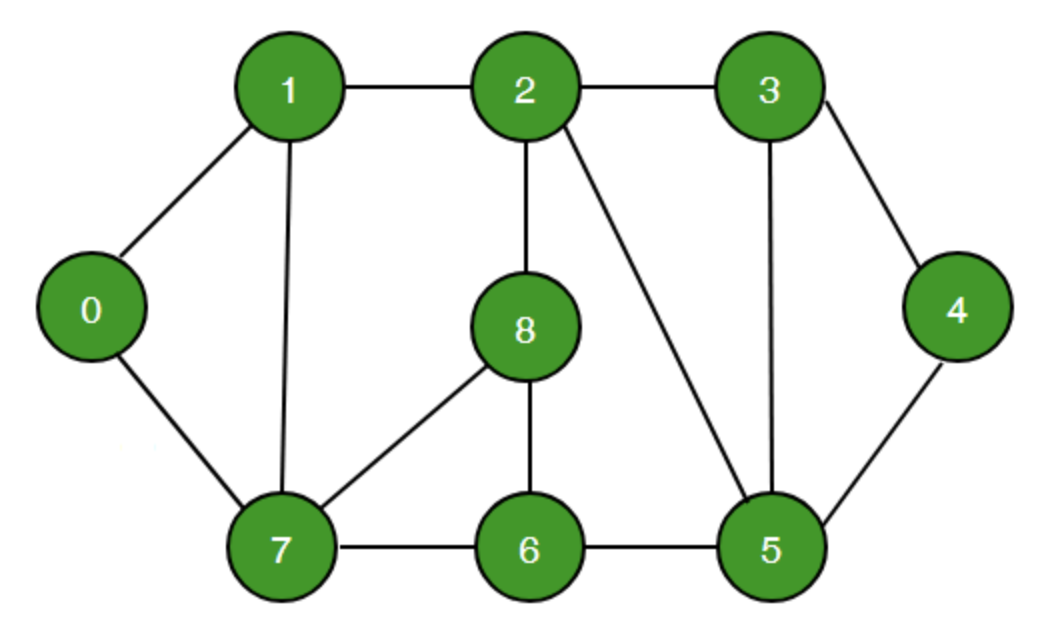

Ví dụ: 
- Đường đi ngắn nhất từ 2 đến 7 là [2, 1, 7] hoặc [2, 8 ,7]
- Đường đi ngắn nhất từ 0 đến 8 là: [0, 7 ,8]

Gợi ý: 
- Sử dụng thuật toán BFS để duyệt từ đỉnh A cho đến khi gặp đỉnh B. 
- Khi đưa một đỉnh mới vào queue, lưu lại đỉnh liền kề trước nó để truy vấn ngược lại đường đi.

In [ ]:
graph = {
    0: [1, 7],
    1: [0, 2, 7],
    2: [1, 3, 5, 8],
    3: [2, 4, 5],
    4: [3, 5],
    5: [2, 3, 4, 6],
    6: [5, 7, 8],
    7: [0, 1, 6, 8],
    8: [2, 6, 7]
}



In [ ]:
from collections import deque

def bfs(graph, vertex_a, vertex_b):
    